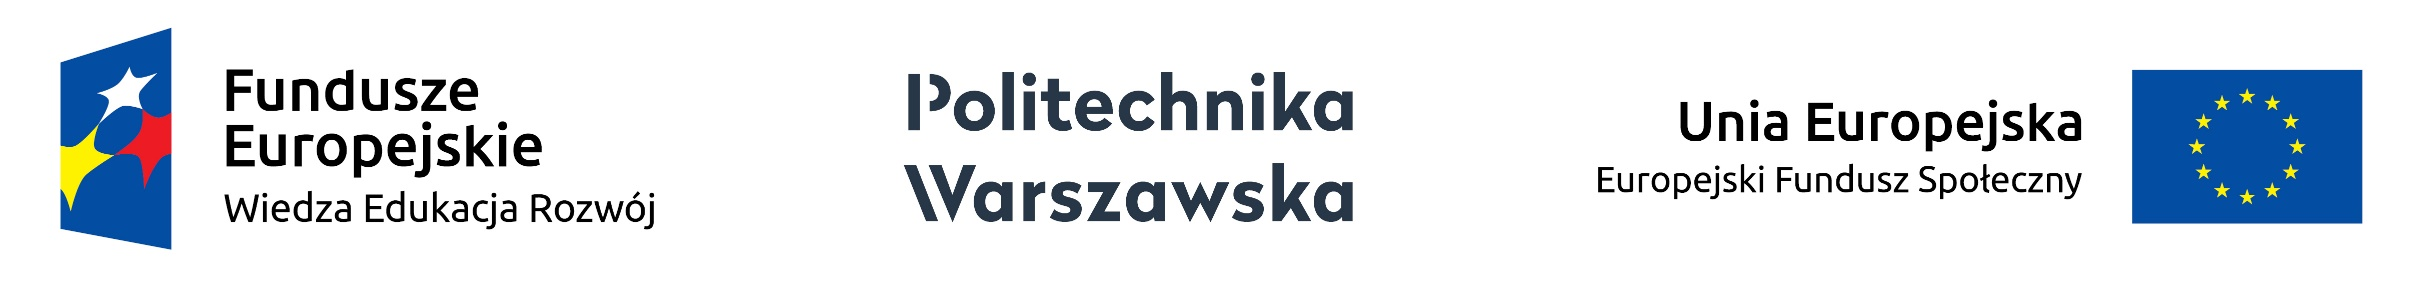

# Programming Language With Numerical Methods
<heads>
Joanna Kozuchowska, Msc
    
## Class 12. Interpolation and approximation

**Whenever you learn a new feature, you should try it out in interactive mode and make errors on purpose to see what goes wrong and what types of errors you run into.**

Implement your own versions of Newton (divided differences) method.

- intrpolation:
  - `polynomial` (numpy)
  - `interpolate` (SciPy)

- approximation:
  - `linalg.lstsq` (numpy)
  - `np.vstack` or `np.vander` for creating Vanderplas matrix

In [3]:
from numpy import polynomial as poly

p1 = poly.Polynomial([1, 2, 3, 5, 0, 6])
p1

Polynomial([1., 2., 3., 5., 0., 6.], domain=[-1,  1], window=[-1,  1])

In [5]:
p2 = poly.Polynomial.fromroots([-1, 1])

print(p2.roots())
p2

[-1.  1.]


Polynomial([-1.,  0.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [7]:
p2.domain

array([-1.,  1.])

In [8]:
p2.window

array([-1.,  1.])

## Exercises<a name="exercises"></a>

In [88]:
from numpy import polynomial as poly
import scipy.interpolate as inter
import numpy as np

### Interpolation

**Exercise 1**

  Use the data in table below to interpolate function $f(x)$ using:
  - a power-base polynomial;
  - a Lagrange interpolation polynomial.
  
1. Verify if $P(x) = f(x)$ for every value of $x$.
2. Using the obtained polynomial, compute $f(x)$ for $x = 3$.
3. Using the obtained polynomial, compute $f(x)$ for $x = 8$.
4. Plot function $f(x)$ on the interval $x \in \langle 0,\: 10 \rangle$, mark given data points and interpolated and extrapolated points (from points~2 and 3).


|x	|  0| 0.5 | 1.0 | 1.5| 2.0 | 2.5|
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
|f(x)| 	1.5000 |	 2.0000 |	 2.0000| 	 1.6364 |	 1.2500 |	 0.9565|

In [77]:
x_a = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
fx = [1.5000, 2.0000, 2.0000, 1.6364, 1.2500, 0.9565]

A x = fx 

In [79]:
x = np.array(x_a)
A = np.array([np.ones_like(x), x, x**2, x**3, x**4, x**5]).T
A

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 5.000000e-01, 2.500000e-01, 1.250000e-01,
        6.250000e-02, 3.125000e-02],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.000000e+00, 1.500000e+00, 2.250000e+00, 3.375000e+00,
        5.062500e+00, 7.593750e+00],
       [1.000000e+00, 2.000000e+00, 4.000000e+00, 8.000000e+00,
        1.600000e+01, 3.200000e+01],
       [1.000000e+00, 2.500000e+00, 6.250000e+00, 1.562500e+01,
        3.906250e+01, 9.765625e+01]])

In [80]:
fx = np.array(fx)
poly_coeff = np.linalg.solve(A, fx)
print(poly_coeff)

[ 1.5         1.31693333 -0.18223333 -1.2291      0.70893333 -0.11453333]


In [81]:
A_v = poly.polynomial.polyvander(x, 5)
poly_coeff_v = np.linalg.solve(A_v, fx)
print(poly_coeff_v)

[ 1.5         1.31693333 -0.18223333 -1.2291      0.70893333 -0.11453333]


In [82]:
np.isclose(poly_coeff_v, poly_coeff)

array([ True,  True,  True,  True,  True,  True])

In [87]:
# compare the results between interpolation and datapoints
# generate the solution based on the computed coefficients
fx_model = poly.polynomial.polyval(x_a, poly_coeff_v)
differences = fx_model - fx
print(differences)

[ 0.00000000e+00 -4.44089210e-16  0.00000000e+00 -4.44089210e-16
  0.00000000e+00  9.99200722e-16]


In [85]:
# compute polynomial values based on the coefficients:
fx_8 = poly.polynomial.polyval(8, poly_coeff_v)
fx_3 = poly.polynomial.polyval(3, poly_coeff_v)

AttributeError: module 'matplotlib.pyplot' has no attribute 'x_label'

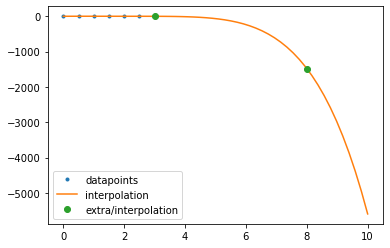

In [86]:
# generate values
x = np.linspace(0, 10)
fx_gen = poly.polynomial.polyval(x, poly_coeff_v)

# plot the results
plt.plot(x_a, fx, ".", label="datapoints")
plt.plot(x, fx_gen, label="interpolation")
plt.plot([3, 8], [fx_3, fx_8], 'o', label="extra/interpolation")
plt.legend()
plt.x_label("x")
plt.y_label("f(x)")
plt.show()


In [93]:
## Lagrange polynomial -> compute the polynomial, compute the values, check the extra and interpolation
lagrange_poly = inter.lagrange(x_a, fx)
lagrange_poly

poly1d([-0.11453333,  0.70893333, -1.2291    , -0.18223333,  1.31693333,
        1.5       ])

In [107]:
# get coefficients
# lagrange poly given from highest degree to lowest -> notice the difference with results below
c = poly.Polynomial(lagrange_poly).coef
p = poly.Polynomial(lagrange_poly)
p

Polynomial([-0.11453333,  0.70893333, -1.2291    , -0.18223333,  1.31693333,
        1.5       ], domain=[-1,  1], window=[-1,  1])

In [101]:
# compare with the previous solution
poly_base = poly.Polynomial(poly_coeff_v)
poly_base

Polynomial([ 1.5       ,  1.31693333, -0.18223333, -1.2291    ,  0.70893333,
       -0.11453333], domain=[-1,  1], window=[-1,  1])

**Exercise 2**

 Using the data points in table below, interpolate the function $f(x)$  using Newton's method at $x = {0, 0.5, 1.0, 7.0, 8.0}$. Compare computed values with exact values: $f(x) = 4.8\cos \frac{\pi x}{20}$.

|x | 0.15 | 2.30 | 3.15 | 4.85 | 6.25 | 7.95|
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
|f(x) | 4.79867|  4.49013 | 4.22430 | 3.47313 | 2.66674 | 1.51909| 

In [73]:
x =[0.15, 2.30, 3.15, 4.85, 6.25, 7.95]
fx = [4.79867, 4.49013, 4.22430, 3.47313, 2.66674, 1.51909] 

### Interpolation

**Exercise 3**
 
Approximate a linear and a parabolic function to the data in table below. Which approximation is better? Why?

|x |1.0 | 2.5 | 3.5 | 4.0 | 1.1 | 1.8 | 2.2 | 3.7|
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
|y|6.008 | 15.722 | 27.130 | 33.772 | 5.257 | 9.549 | 11.098 | 28.828|

In [12]:
x  = [1.0, 2.5, 3.5, 4.0, 1.1, 1.8, 2.2, 3.7]
y  = [6.008, 15.722, 27.130, 33.772, 5.257, 9.549, 11.098, 28.828]

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import polynomial as poly

In [6]:
# 1. approximate a linear function using least squares method

# populate matrix A with values for coefficients y = a + b*x -> a and b are unknowns, so the first col of A
# will be filled with 0, the second column will be filled with values of x -> power-base
# use either polyvander or stacking matrices for that
A_v = poly.polynomial.polyvander(x, 1) # first degree polynomial
A_v

array([[1. , 1. ],
       [1. , 2.5],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 1.1],
       [1. , 1.8],
       [1. , 2.2],
       [1. , 3.7]])

In [9]:
# y needs to be changed to an array, so we can use linear algebra on two arrays
# additional reshape for y to be two-dimensional (with one column), not needed
y = np.array(y).reshape(-1, 1)
y
#y.shape

array([[ 6.008],
       [15.722],
       [27.13 ],
       [33.772],
       [ 5.257],
       [ 9.549],
       [11.098],
       [28.828]])

In [22]:
# create a normal-equations matrix and solve ATA*coefficients = AT y -> coefficients = (AtA)**-1 * ATy
coefficients = np.linalg.inv(A_v.T @ A_v) @ (A_v.T @y)
print(coefficients)

[-6.18989525  9.43854354]


In [28]:
# verify the solution with built-in method
solution = np.linalg.lstsq(A_v, y)
print(solution)

(array([-6.18989525,  9.43854354]), array([30.2014719]), 2, array([8.08205117, 1.07724133]))


<ipython-input-28-0368d5b08fd0>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  solution = np.linalg.lstsq(A_v, y)


In [21]:
# to evaluate polynomial at given points, we can use polyval function
from numpy.polynomial.polynomial import polyval
polyval(1, [1,2,3])

6.0

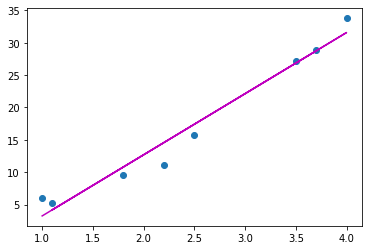

In [25]:
# create a polynomial or a linear function based on the coefficients
y_poly = polyval(x, coefficients)

# check the solution on a plot
plt.scatter(x, y)
plt.plot(x, y_poly, "m")
plt.show()

<ipython-input-31-20a8bccb6384>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  solution, *other = np.linalg.lstsq(A, y)


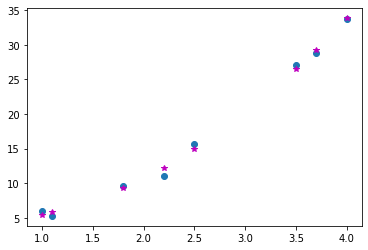

In [31]:
# fitting a parabola to points
A = poly.polynomial.polyvander(x, 2)
solution, *other = np.linalg.lstsq(A, y)
y_poly = polyval(x, solution)

# check the solution on a plot
plt.scatter(x, y)
plt.plot(x, y_poly, "*m") # x is not sorted, so the line does not look well
plt.show()

**Exercise 4**

 Create a complicated function and compute values for 100 points of this function. Next, add some random noise to the data. Approximate a polynomial curve with degree $n$, $n \in \{0, 1, 2, 3, 4, 10\}$. Compare variance values. Which curve is the best fit for observation data?

In [64]:
def some_function(x):
    return x**5 + 8*np.sin(x) + 2.76*x - 12.34

# create x vector in some range, e.g. -2, 2
x = np.linspace(-2, 2, 100)
fx = some_function(x)

# add random noise
noise = (np.random.random(100)-0.5)*20 # random returns values from 0-1
fx_noise = fx + noise

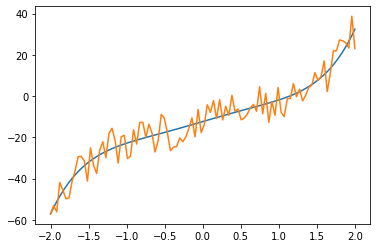

In [65]:
plt.plot(x, fx)
plt.plot(x, fx_noise)
plt.show()

In [ ]:
from numpy.polynomial.polynomial import polyval

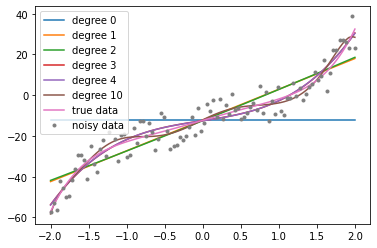

{0: {'residuals': array([36624.71952384]), 'variance': array([369.94666186])}, 1: {'residuals': array([5627.55580926]), 'variance': array([57.42403887])}, 2: {'residuals': array([5620.40130834]), 'variance': array([57.94228153])}, 3: {'residuals': array([3323.63204385]), 'variance': array([34.62116712])}, 4: {'residuals': array([3323.33867848]), 'variance': array([34.98251241])}, 10: {'residuals': array([2834.56952134]), 'variance': array([31.84909575])}}


In [72]:
# create an approximation, using polyvander and lstsq
degree = [0, 1, 2, 3, 4, 10]
sol_metrics = {}
for d in degree:
    A = poly.polynomial.polyvander(x, d)
    sol, residuals, *other = np.linalg.lstsq(A, fx_noise, rcond=None) # residuals is actually sum of squared residuals
    # compute variance value:
    variance = residuals / (x.shape[0] - d -1)
    
    # save the metrics to dictionary for comparison later
    sol_metrics[d] = {"residuals": residuals, "variance": variance}
    
    # create a polynomial
    y_d = polyval(x, sol)
    plt.plot(x, y_d, label=f"degree {d}")

plt.plot(x, fx, label="true data")
plt.plot(x, fx_noise, ".", label="noisy data")
plt.legend()
plt.show()

print(sol_metrics)

**Exercise 5**

Given the data in table below, approximate a periodic curve:
- $F(t) = c_{1} +c_{2}\cos(2\pi t) + c_{3}\sin(2\pi t)$
- $F(t) = c_{1} +c_{2}\cos(2\pi t) + c_{3}\sin(2\pi t) + c_{4}\cos(4\pi t)$ 

|t | 0 | 1/6 | 1/3 | 1/2 | 2/3 | 5/6|
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
|y | 0 | 2 | 0 | -1 | 1 | 1 |

In [34]:
t = [0, 1/6, 1/3, 1/2, 2/3, 5/6]
y = [0, 2, 0, -1, 1, 1]

In [42]:
# 𝐹(𝑡) = 𝑐1 + 𝑐2cos(2𝜋𝑡) + 𝑐3sin(2𝜋𝑡) 0> c1, c2, c3 are unknowns
# switch t and y to np.arrays
t = np.array(t)
y = np.array(y)

# first, we populate the matrix A
# first column: c1 * 1 -> the column will contain 1 for all t
col1 = np.ones_like(t)
# the second column: c2 * cos(2*pi*t) -> the column will contain cos(2*pi*t) for all t
col2 = np.cos(2 * np.pi * t)
# the third column: c3 * sin(2*pi*t) -> the column will contain sin(2*pi*t) for all t
col3 = np.sin(2 * np.pi * t)

# stack all the columns
A = np.vstack((col1, col2, col3)).T
A

array([[ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  5.00000000e-01,  8.66025404e-01],
       [ 1.00000000e+00, -5.00000000e-01,  8.66025404e-01],
       [ 1.00000000e+00, -1.00000000e+00,  1.22464680e-16],
       [ 1.00000000e+00, -5.00000000e-01, -8.66025404e-01],
       [ 1.00000000e+00,  5.00000000e-01, -8.66025404e-01]])

In [44]:
# compute the least square solution, either using normal equations and matrix multiplication or using lstsq method
# take solution and aggregate the rest of results to `other` variable
sol, *other = np.linalg.lstsq(A, y, rcond=None) # rcond NOne supresses the warning
print(sol)

[0.5        0.66666667 0.        ]


In [46]:
# define a function for computing the model values:
def periodic(coef, t):
    return coef[0] + coef[1] * np.cos(np.pi * t) + coef[2] * np.sin(np.pi * t)

y_model = periodic(sol, t)

<function matplotlib.pyplot.show(close=None, block=None)>

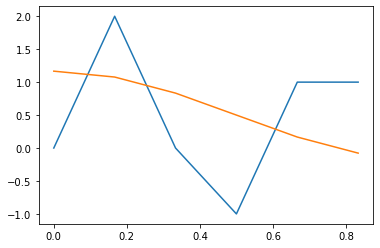

In [47]:
plt.plot(t, y)
plt.plot(t, y_model)
plt.show

In [48]:
# 𝐹(𝑡)=𝑐1+𝑐2cos(2𝜋𝑡)+𝑐3sin(2𝜋𝑡)+𝑐4cos(4𝜋𝑡)
col1 = np.ones_like(t)
col2 = np.cos(2 * np.pi * t)
col3 = np.sin(2 * np.pi * t)
col4 = np.cos(4 * np.pi * t)

# stack all the columns
A = np.vstack((col1, col2, col3, col4)).T
sol, *other = np.linalg.lstsq(A, y, rcond=None) # rcond NOne supresses the warning
print(sol)

[ 5.00000000e-01  6.66666667e-01 -5.89003422e-16 -1.00000000e+00]


<function matplotlib.pyplot.show(close=None, block=None)>

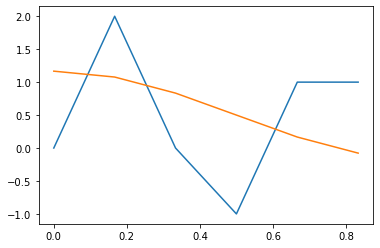

In [49]:
def periodic_2(coef, t):
    return coef[0] + coef[1] * np.cos(np.pi * t) + coef[2] * np.sin(np.pi * t) + coef[3] * np.cos(4 * np.pi * t)

y_model = periodic(sol, t)
plt.plot(t, y)
plt.plot(t, y_model)
plt.show